# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

I will build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***) and **Deep Learning algorithms**.

---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 

Project Structure is separated in five parts: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning and Deep Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [36]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erdem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erdem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\erdem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling

AttributeError: 'numpy.int32' object has no attribute '0f'

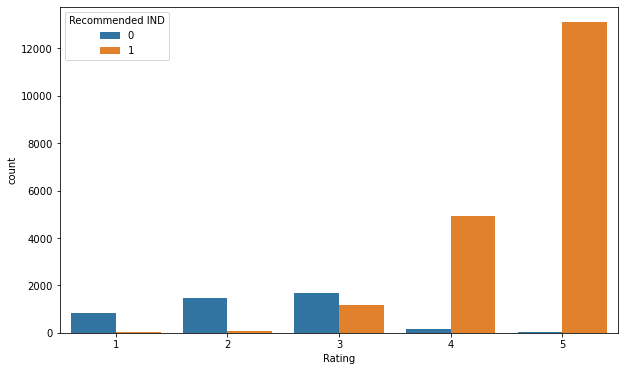

In [5]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.patches:
        ax.annotate('{.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [6]:
df["Recommended IND"].unique()

array([1, 0], dtype=int64)

In [7]:
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]

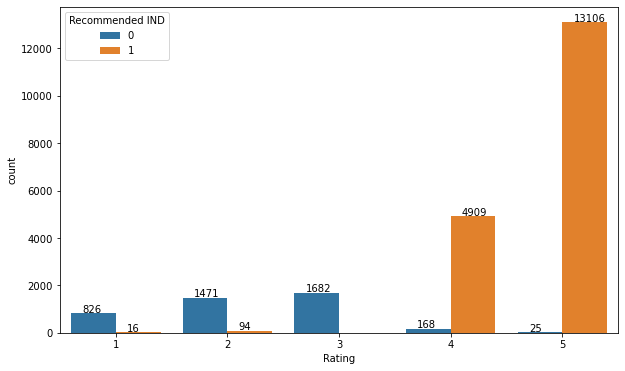

In [8]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

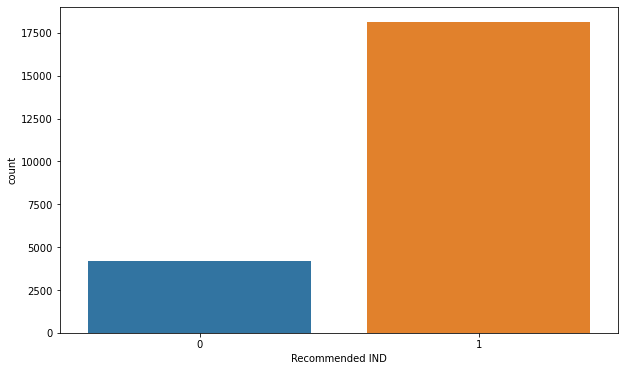

In [9]:
plt.fig = plt.figure(figsize = (10,6))
sns.countplot(x="Recommended IND", data=df);

In [10]:
df["Recommended IND"].value_counts()

1    18125
0     4172
Name: Recommended IND, dtype: int64

## 2. Feature Selection and Data Cleaning

### Feature Selection and Rename Column Name

In [11]:
df.rename(columns={"Review Text":"text", "Recommended IND":"label"}, inplace=True)

In [12]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,text,Rating,label,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [13]:
df=df[['text','label']]
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


### Missing Value Detection

In [14]:
df.isnull().sum()

text     826
label      0
dtype: int64

In [15]:
df.dropna(inplace = True) 
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23478,I was surprised at the positive reviews for th...,0
23479,So i wasn't sure about ordering this skirt bec...,1
23481,I was very happy to snag this dress at such a ...,1
23483,"This fit well, but the top was very see throug...",0


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step I will change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 



### Tokenization, Noise Removal, Lexicon Normalization

In [19]:
stop_words = stopwords.words('english')

In [20]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())
    
    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma #kelimenin kokune inme
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [21]:
df2 = df.copy()

In [22]:
df2["text"] = df2["text"].apply(cleaning)
df2["text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: text, dtype: object

### Rare Words

In [23]:
" ".join(df2["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 's

In [24]:
rare_words = pd.Series(" ".join(df2["text"]).split()).value_counts()
rare_words

dress        10711
fit           9619
size          8805
love          8703
top           7793
             ...  
tuned            1
compl            1
tame             1
assurance        1
waiver           1
Length: 11719, dtype: int64

In [25]:
rare_words = rare_words[rare_words <= 2]

In [26]:
rare_words

introduced    2
unbearably    2
librarian     2
containing    2
february      2
             ..
tuned         1
compl         1
tame          1
assurance     1
waiver        1
Length: 6364, dtype: int64

In [27]:
rare_words.index

Index(['introduced', 'unbearably', 'librarian', 'containing', 'february',
       'host', 'distract', 'dyed', 'talented', 'informed',
       ...
       'cloer', 'tory', 'yolk', 'eas', 'geiger', 'tuned', 'compl', 'tame',
       'assurance', 'waiver'],
      dtype='object', length=6364)

In [29]:
df2["text"] = df2["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df2["text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: text, dtype: object

## 4. WordCloud - Repetition of Words

### Detect Reviews (positive and negative separately)

In [30]:
positive_sentences = df[df["label"] == 1]["text"]
positive_sentences

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
6        I aded this in my basket at hte last mintue to...
                               ...                        
23476    These bottoms are very cute but defiantly chee...
23477    I'm so impressed with the beautiful color comb...
23479    So i wasn't sure about ordering this skirt bec...
23481    I was very happy to snag this dress at such a ...
23485    This dress in a lovely platinum is feminine an...
Name: text, Length: 17370, dtype: object

In [31]:
negative_sentences = df[df["label"] == 0]["text"]
negative_sentences

2        I had such high hopes for this dress and reall...
5        I love tracy reese dresses, but this one is no...
10       Dress runs small esp where the zipper area run...
22       First of all, this is not pullover styling. th...
25       Loved the material, but i didnt really look at...
                               ...                        
23449    I tried these on because the color is really p...
23450    I wanted to love this jacket. so soft and grea...
23460    I purchased this for a very good price and i t...
23478    I was surprised at the positive reviews for th...
23483    This fit well, but the top was very see throug...
Name: text, Length: 4101, dtype: object

### Collect Words (positive and negative separately)

In [32]:
positive_words = " ".join(positive_sentences)
positive_words[:100]

"Absolutely wonderful - silky and sexy and comfortable Love this dress!  it's sooo pretty.  i happene"

In [33]:
negative_words = " ".join(negative_sentences)
negative_words[:100]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the pe'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [43]:
from wordcloud import WordCloud

In [44]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [45]:
wordcloud_positive = WordCloud(background_color="white", max_words =250)

In [46]:
wordcloud_positive.generate(positive_words)

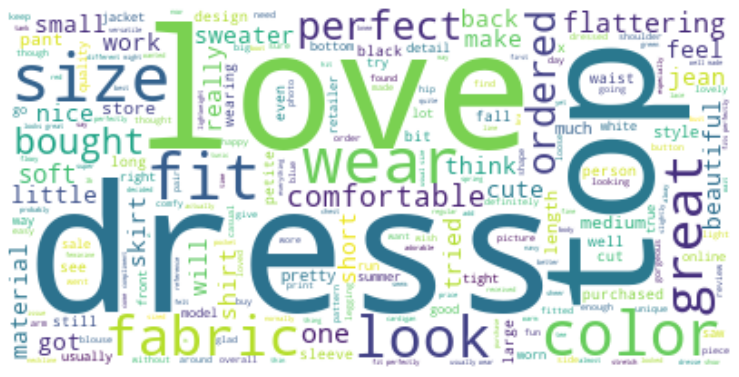

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear",)
plt.axis("off")
plt.show()

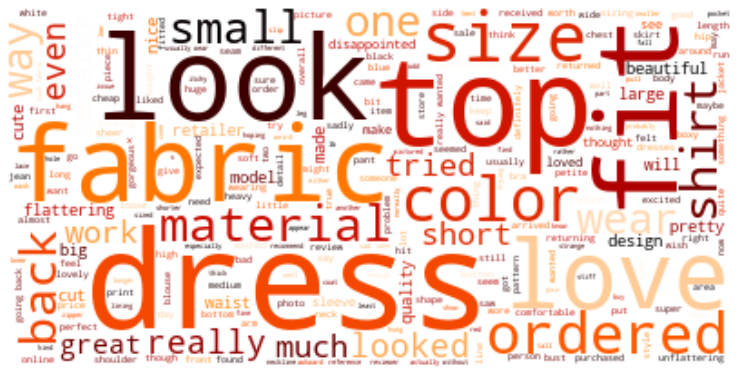

In [48]:
wordcloud_negative = WordCloud(background_color="white", max_words=250, colormap='gist_heat')

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning and Deep Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = df2["text"]
y= df2["label"]

In [51]:
y = y.map({0:1, 1:0})
#0lari 1, 1leri 0 yaptim. hedef labelimiz 1 olsun. amacimiz olumsuzlari yakalamak. 

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [54]:
#scaledeki gibi traine fit trnsform, test e sadece transform
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [56]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [60]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Eval functions

In [62]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [63]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [68]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [65]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[3122  353]
 [ 157  663]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3475
           1       0.65      0.81      0.72       820

    accuracy                           0.88      4295
   macro avg       0.80      0.85      0.82      4295
weighted avg       0.89      0.88      0.89      4295

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     13895
           1       0.78      0.96      0.86      3281

    accuracy                           0.94     17176
   macro avg       0.88      0.95      0.91     17176
weighted avg       0.95      0.94      0.94     17176



In [66]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_count_rec = scores
    elif i == "f1-1":
        log_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8890883671671969

 precision-0          score for count : 0.9562920154442901

 recall-0             score for count : 0.9042822070637226

 f1-0                 score for count : 0.9295332262876987

 precision-1          score for count : 0.6706748914521807

 recall-1             score for count : 0.8247525761731781

 f1-1                 score for count : 0.739551507207182



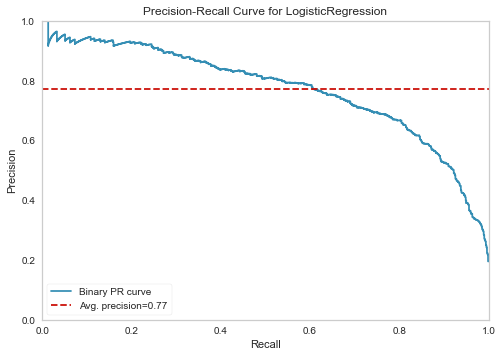

In [67]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [52]:
log_AP_count = viz.score_

### TF-IDF

In [53]:
log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [54]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[3003  472]
 [ 114  706]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3475
           1       0.60      0.86      0.71       820

    accuracy                           0.86      4295
   macro avg       0.78      0.86      0.81      4295
weighted avg       0.89      0.86      0.87      4295

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     13895
           1       0.62      0.90      0.74      3281

    accuracy                           0.88     17176
   macro avg       0.80      0.88      0.83     17176
weighted avg       0.91      0.88      0.88     17176



In [55]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8821605556433203

 precision-0          score for tfidf : 0.9664961324942005

 recall-0             score for tfidf : 0.885066426340569

 f1-0                 score for tfidf : 0.9239629383089477

 precision-1          score for tfidf : 0.6413675413793383

 recall-1             score for tfidf : 0.8698680406256949

 f1-1                 score for tfidf : 0.7381657801904014



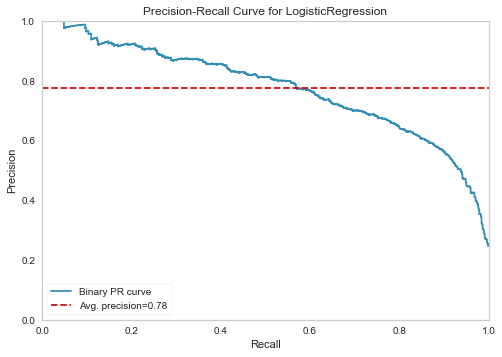

In [56]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced"),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [57]:
log_AP_tfidf = viz.score_

## Naive Bayes 

### Countvectorizer

In [58]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_count,y_train)

MultinomialNB()

In [59]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[3195  280]
 [ 183  637]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3475
           1       0.69      0.78      0.73       820

    accuracy                           0.89      4295
   macro avg       0.82      0.85      0.83      4295
weighted avg       0.90      0.89      0.89      4295

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13895
           1       0.76      0.84      0.80      3281

    accuracy                           0.92     17176
   macro avg       0.86      0.89      0.87     17176
weighted avg       0.92      0.92      0.92     17176



In [60]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_count_rec = scores
    elif i == "f1-1":
        nb_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.899218931685677

 precision-0          score for count : 0.9490057293245078

 recall-0             score for count : 0.9251518353351876

 f1-0                 score for count : 0.9369125167689614

 precision-1          score for count : 0.7138280067444844

 recall-1             score for count : 0.789398769367633

 f1-1                 score for count : 0.749551918590552



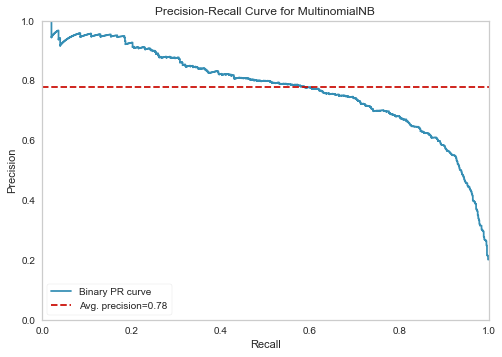

In [61]:
viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [62]:
nb_AP_count = viz.score_

### TF-IDF

In [63]:
nb = BernoulliNB()
nb.fit(X_train_tf_idf,y_train)

BernoulliNB()

In [64]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3173  302]
 [ 203  617]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3475
           1       0.67      0.75      0.71       820

    accuracy                           0.88      4295
   macro avg       0.81      0.83      0.82      4295
weighted avg       0.89      0.88      0.88      4295

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13895
           1       0.75      0.82      0.78      3281

    accuracy                           0.91     17176
   macro avg       0.85      0.88      0.86     17176
weighted avg       0.92      0.91      0.91     17176



In [65]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_tfidf_rec = scores
    elif i == "f1-1":
        nb_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8917087767805748

 precision-0          score for tfidf : 0.9421229461452889

 recall-0             score for tfidf : 0.9228486411734543

 f1-0                 score for tfidf : 0.932374051119527

 precision-1          score for tfidf : 0.6995378723245316

 recall-1             score for tfidf : 0.7598348654459189

 f1-1                 score for tfidf : 0.7283002544141733



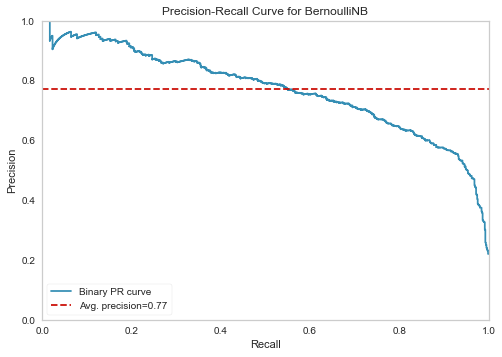

In [66]:
viz = PrecisionRecallCurve(
    BernoulliNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [67]:
nb_AP_tfidf = viz.score_

## Support Vector Machine (SVM)

### Countvectorizer

In [68]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101) # C=0.01 bunu hoca deneyerek bulmus
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [69]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[3079  396]
 [ 144  676]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3475
           1       0.63      0.82      0.71       820

    accuracy                           0.87      4295
   macro avg       0.79      0.86      0.82      4295
weighted avg       0.89      0.87      0.88      4295

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.91      0.95     13895
           1       0.71      0.93      0.81      3281

    accuracy                           0.91     17176
   macro avg       0.85      0.92      0.88     17176
weighted avg       0.93      0.91      0.92     17176



In [70]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_count_rec = scores
    elif i == "f1-1":
        svc_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8852460127886376

 precision-0          score for count : 0.9626440664343662

 recall-0             score for count : 0.8928388002341107

 f1-0                 score for count : 0.9263962009467429

 precision-1          score for count : 0.6531251818533468

 recall-1             score for count : 0.8531006746237674

 f1-1                 score for count : 0.7396097688709296



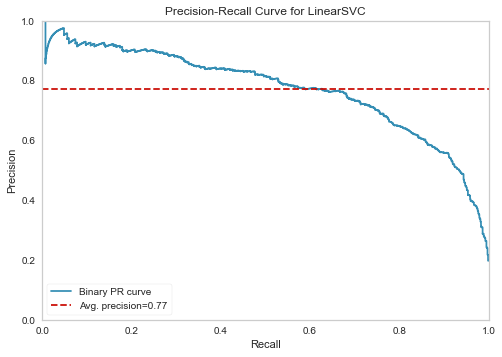

In [71]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [72]:
svc_AP_count = viz.score_

### TD-IDF

In [73]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [74]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[2995  480]
 [ 110  710]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3475
           1       0.60      0.87      0.71       820

    accuracy                           0.86      4295
   macro avg       0.78      0.86      0.81      4295
weighted avg       0.89      0.86      0.87      4295

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     13895
           1       0.62      0.90      0.73      3281

    accuracy                           0.88     17176
   macro avg       0.80      0.88      0.83     17176
weighted avg       0.91      0.88      0.88     17176



In [75]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_tfidf_rec = scores
    elif i == "f1-1":
        svc_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8642283255237801

 precision-0          score for tfidf : 0.9659072134501292

 recall-0             score for tfidf : 0.8626837795422411

 f1-0                 score for tfidf : 0.9113504416922691

 precision-1          score for tfidf : 0.5996335194700426

 recall-1             score for tfidf : 0.8707836014530358

 f1-1                 score for tfidf : 0.7100458549852414



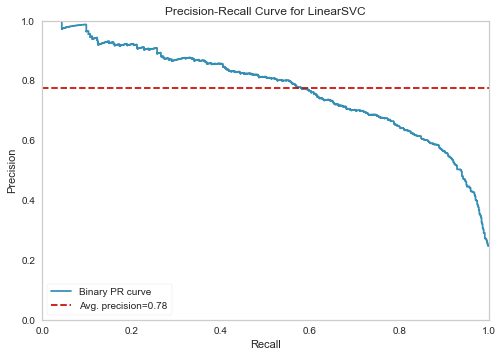

In [76]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [77]:
svc_AP_tfidf = viz.score_

## Random Forest

### Countvectorizer

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [79]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[3032  443]
 [ 176  644]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3475
           1       0.59      0.79      0.68       820

    accuracy                           0.86      4295
   macro avg       0.77      0.83      0.79      4295
weighted avg       0.88      0.86      0.86      4295

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     13895
           1       0.69      0.89      0.78      3281

    accuracy                           0.90     17176
   macro avg       0.83      0.90      0.86     17176
weighted avg       0.92      0.90      0.91     17176



In [80]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_count_rec = scores
    elif i == "f1-1":
        rf_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.868479249143842

 precision-0          score for count : 0.9480756179419695

 recall-0             score for count : 0.8860030765884053

 f1-0                 score for count : 0.9159614796263883

 precision-1          score for count : 0.6220774272246807

 recall-1             score for count : 0.794272184743124

 f1-1                 score for count : 0.6975078895138223



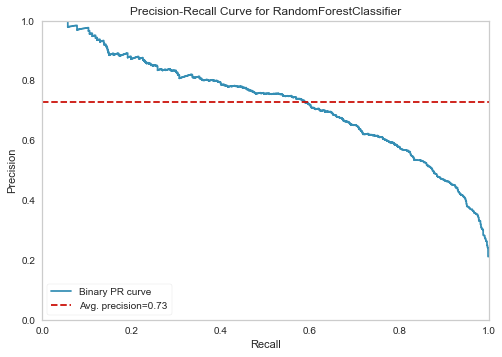

In [81]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [82]:
rf_AP_count = viz.score_

### TF-IDF

In [83]:
rf = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [84]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[2984  491]
 [ 169  651]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3475
           1       0.57      0.79      0.66       820

    accuracy                           0.85      4295
   macro avg       0.76      0.83      0.78      4295
weighted avg       0.87      0.85      0.86      4295

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     13895
           1       0.66      0.88      0.75      3281

    accuracy                           0.89     17176
   macro avg       0.81      0.89      0.84     17176
weighted avg       0.91      0.89      0.90     17176



In [85]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_tfidf_rec = scores
    elif i == "f1-1":
        rf_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.854563995055946

 precision-0          score for tfidf : 0.9472457425970612

 recall-0             score for tfidf : 0.8686581102288795

 f1-0                 score for tfidf : 0.9062277661626285

 precision-1          score for tfidf : 0.5882782771241855

 recall-1             score for tfidf : 0.7948726740306917

 f1-1                 score for tfidf : 0.6760061123584454



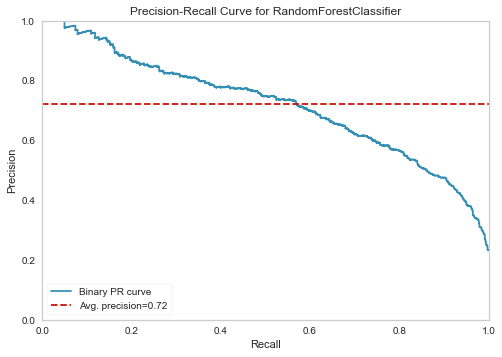

In [86]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [87]:
rf_AP_tfidf = viz.score_

## Ada Boosting

### Countvectorizer

In [88]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [89]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3304  171]
 [ 321  499]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3475
           1       0.74      0.61      0.67       820

    accuracy                           0.89      4295
   macro avg       0.83      0.78      0.80      4295
weighted avg       0.88      0.89      0.88      4295

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     13895
           1       0.84      0.72      0.78      3281

    accuracy                           0.92     17176
   macro avg       0.89      0.85      0.87     17176
weighted avg       0.92      0.92      0.92     17176



In [90]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model =AdaBoostClassifier(n_estimators= 500, random_state = 42)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_count_rec = scores
    elif i == "f1-1":
        ada_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8909516761441261

 precision-0          score for count : 0.918440193498834

 recall-0             score for count : 0.9495502690719994

 f1-0                 score for count : 0.9337271830375382

 precision-1          score for count : 0.7506101422617403

 recall-1             score for count : 0.6427959819111869

 f1-1                 score for count : 0.6923575676225184



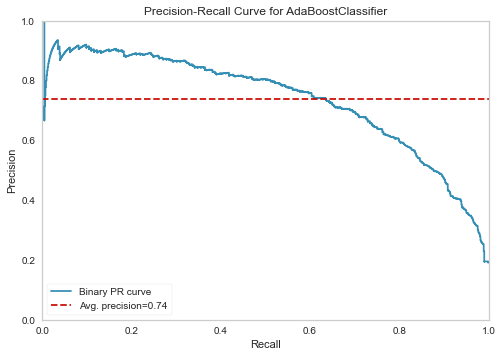

In [91]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [92]:
ada_AP_count = viz.score_

### TF-IDF

In [93]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [94]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3255  220]
 [ 317  503]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3475
           1       0.70      0.61      0.65       820

    accuracy                           0.87      4295
   macro avg       0.80      0.78      0.79      4295
weighted avg       0.87      0.87      0.87      4295

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     13895
           1       0.86      0.77      0.82      3281

    accuracy                           0.93     17176
   macro avg       0.91      0.87      0.89     17176
weighted avg       0.93      0.93      0.93     17176



In [95]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model =AdaBoostClassifier(n_estimators= 500, random_state = 42)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_tfidf_rec = scores
    elif i == "f1-1":
        ada_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8854204310385156

 precision-0          score for tfidf : 0.9166796910741709

 recall-0             score for tfidf : 0.9442247152601894

 f1-0                 score for tfidf : 0.930233509680517

 precision-1          score for tfidf : 0.7295416600331297

 recall-1             score for tfidf : 0.6363916895247981

 f1-1                 score for tfidf : 0.6795206916969422



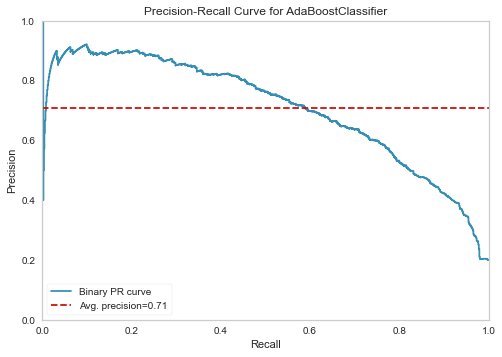

In [96]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [97]:
ada_AP_tfidf = viz.score_

## DL modeling

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [99]:
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### Tokenization

In [147]:
X = df['text'].values
y = df['label'].map({0:1, 1:0}).values

In [148]:
num_words = 10000 

tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' 

In [149]:
tokenizer.fit_on_texts(X)

### Creating word index

In [150]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 'or': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'if': 52,
 'little': 53,
 'ordered': 54,
 'these': 55,
 'one': 56,
 'will': 57,
 'flattering': 58,
 'well': 59,
 'soft': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'back': 64,
 'comfortable': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'all': 75,
 'looks': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


In [151]:
len(tokenizer.word_index)

14483

### Converting tokens to numeric

In [152]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [153]:
X[100]

'The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [154]:
print(X_num_tokens[100])

[1, 80, 6, 474, 30, 5, 6, 391, 2, 24, 1, 1897, 484, 47, 3, 21, 5, 2, 239, 2154, 199, 189, 550, 14, 90, 3, 865, 313, 4, 278, 109, 5, 74, 126, 8, 22, 30, 2, 240, 31, 4, 46, 9, 75, 102, 150, 5, 6, 1, 2876, 78, 149, 9, 1, 203, 2, 43, 319, 7, 25, 4, 264, 264]


In [155]:
len(X_num_tokens[100])

63

In [156]:
len(X_num_tokens[150])

30

In [157]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

### Maximum number of tokens for all documents¶

In [158]:
num_tokens.mean()

60.08271622188067

In [159]:
num_tokens.max()

116

In [160]:
num_tokens.argmax()

15417

In [161]:
X[15417]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [162]:
max_tokens = 106

In [163]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9853756229332589

### Fixing token counts of all documents (pad_sequences)

In [164]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [165]:
X_pad.shape

(21471, 106)

In [166]:
np.array(X_num_tokens[500])

array([  21,    1,  256,    3,    1,  119,    5,  557,    2,  556, 1992,
         14, 1614,  221,   66,    2,   24,    4,  354,  198,   10,    7,
         56,  128,  190,   32,   48,  871,    2,  139,    7,   14,    1,
        703,  148,    2,  506,   24, 1129,  316,  160,   12,    5])

In [167]:
X_pad[500]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,   21,    1,  256,
          3,    1,  119,    5,  557,    2,  556, 1992,   14, 1614,  221,
         66,    2,   24,    4,  354,  198,   10,    7,   56,  128,  190,
         32,   48,  871,    2,  139,    7,   14,    1,  703,  148,    2,
        506,   24, 1129,  316,  160,   12,    5])

In [168]:
np.array(X_num_tokens[15417])

array([   2,   21,  764,  221,    2,   21,    1,   83,    3,  144,   13,
          7,  479,   77,    2,  191,    1,  439,  221,   20,  360,   62,
          2,  521,    8,   17,  483,  106,    8,  181,   56,   11,   37,
        107,    4,   81,    9,    4,   25,  422,    9,    4,  244,   61,
        416,   41,  115,   67,    4,   81,    8,  181,   15,    2,  104,
          5,    9,    1,  120,  765,    2,  117,  805,  113,    1,   25,
         11,    5,  162,   28,    2,   16, 1624,  523,  164,   13,    1,
         25,    2, 4014, 1773,    1,   22,    3,    5,   16,    4,   81,
         33,    4, 1378,    1,   25,    6,   51,   71,   52,   40,   27,
          1,  516,   78,  673,   36,  592,  145,   42,    4,   22,   36,
        265,   52,   40,   27,  107,    4])

In [169]:
X_pad[15417]

array([  13,    7,  479,   77,    2,  191,    1,  439,  221,   20,  360,
         62,    2,  521,    8,   17,  483,  106,    8,  181,   56,   11,
         37,  107,    4,   81,    9,    4,   25,  422,    9,    4,  244,
         61,  416,   41,  115,   67,    4,   81,    8,  181,   15,    2,
        104,    5,    9,    1,  120,  765,    2,  117,  805,  113,    1,
         25,   11,    5,  162,   28,    2,   16, 1624,  523,  164,   13,
          1,   25,    2, 4014, 1773,    1,   22,    3,    5,   16,    4,
         81,   33,    4, 1378,    1,   25,    6,   51,   71,   52,   40,
         27,    1,  516,   78,  673,   36,  592,  145,   42,    4,   22,
         36,  265,   52,   40,   27,  107,    4])

### Train Set Split

In [170]:
from sklearn.model_selection import train_test_split

In [270]:
from keras.layers import Bidirectional

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=42)

### Modeling

In [283]:
model = Sequential()

In [284]:
embedding_size = 100

In [285]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [286]:
model.add(Bidirectional(GRU(units=48, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units=48, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units=48)))
model.add(Dense(1, activation='sigmoid'))

In [287]:
optimizer = Adam(lr=0.004)

In [288]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [289]:
model.summary() 
# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 100*48 +2*48)*3 ==> m = 100, n = 48
# (48*48 + 48*48  +2*48)*3 ==> m =  48, n = 48
# (48*48 + 48*48  +2*48)*3 ==> m =  48, n = 48

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 106, 100)          1000000   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 106, 96)           43200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 106, 96)           0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 106, 96)           42048     
_________________________________________________________________
dropout_11 (Dropout)         (None, 106, 96)           0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 96)                42048     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [290]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 3, restore_best_weights=True)

In [291]:
pd.Series(y_train).value_counts(normalize=True)

0    0.808984
1    0.191016
dtype: float64

In [292]:
weights = {0:19, 1:81}

In [293]:
model.fit(X_train, y_train, epochs=25, batch_size=128, class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
151/151 [==============================] - 155s 941ms/step - loss: 15.5538 - recall: 0.6861 - val_loss: 0.3059 - val_recall: 0.8366
Epoch 2/25
151/151 [==============================] - 139s 922ms/step - loss: 6.9801 - recall: 0.9294 - val_loss: 0.3718 - val_recall: 0.9049
Epoch 3/25
151/151 [==============================] - 143s 945ms/step - loss: 4.7887 - recall: 0.9615 - val_loss: 0.3092 - val_recall: 0.8585
Epoch 4/25
151/151 [==============================] - 145s 960ms/step - loss: 3.2853 - recall: 0.9773 - val_loss: 0.4045 - val_recall: 0.8732
Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping


### Model evaluation

In [294]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,12.321014,0.814413,0.305905,0.836585
1,6.870423,0.932810,0.371841,0.904878
2,4.872340,0.958548,0.309165,0.858537
3,3.509550,0.973720,0.404531,0.873171


<AxesSubplot:>

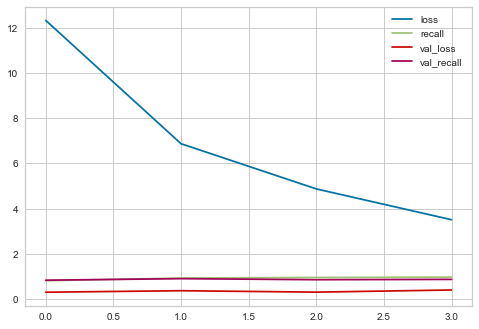

In [295]:
model_loss.plot()

In [296]:
model.evaluate(X_train, y_train)

604/604 [==============================] - 37s 61ms/step - loss: 0.2194 - recall: 0.9317


[0.21937693655490875, 0.931725800037384]

In [297]:
model.evaluate(X_test, y_test)

68/68 [==============================] - 4s 63ms/step - loss: 0.3059 - recall: 0.8366


[0.3059051036834717, 0.8365853428840637]

In [298]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[14197  1435]
 [  252  3439]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     15632
           1       0.71      0.93      0.80      3691

    accuracy                           0.91     19323
   macro avg       0.84      0.92      0.87     19323
weighted avg       0.93      0.91      0.92     19323



In [299]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[1537  201]
 [  67  343]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1738
           1       0.63      0.84      0.72       410

    accuracy                           0.88      2148
   macro avg       0.79      0.86      0.82      2148
weighted avg       0.90      0.88      0.88      2148



In [300]:
from sklearn.metrics import precision_recall_curve, average_precision_score

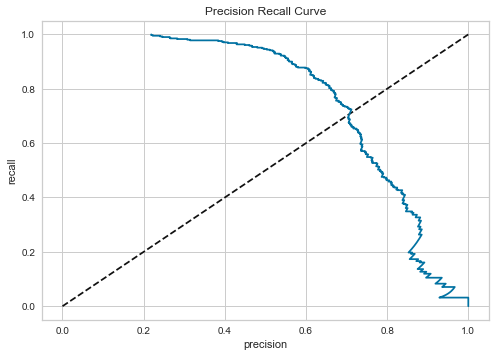

In [301]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [302]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

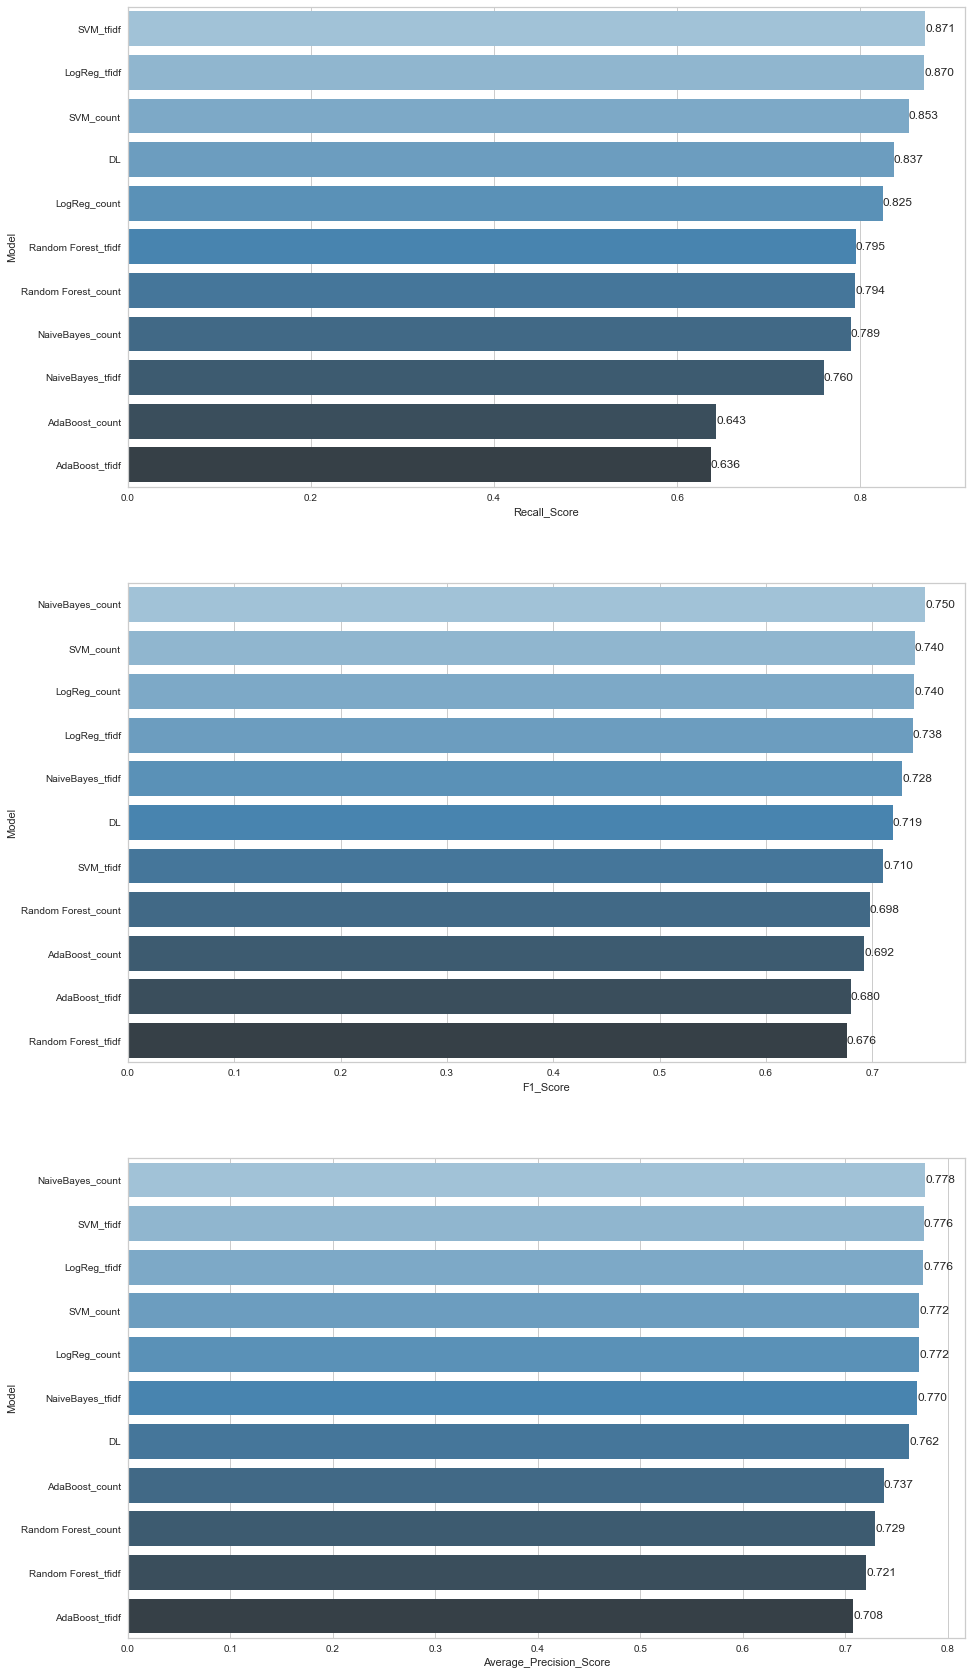

In [303]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();